# Linear Regression by Gradient Descent

**Machine Learning:** An algorithm that learns to do a task without being explicitly programmed.

**Supervised Learning:** An algorithm that learns from labeled training data.

The simples machine learning algorithm is linear regression. We will code up linear regression from scratch with a twist: We will use gradient descent, which is also how neural networks learn.

Most of this lesson is pretty much stolen from Jeremy Howard's fast.ai [lesson zero](https://www.youtube.com/watch?v=ACU-T9L4_lI).

fast.ai is, in my opinion, the best resource to learn about deep learning. If you want to dive into deep learning, check out my [blog post](https://raspstephan.github.io/2018/01/14/deep-learning-resources.html).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

Using TensorFlow backend.


## Linear regression from scratch

We will learn the parameters a and b of a line.

In [2]:
def lin(a, b, x): return a*x + b

Chose the true parameters we want to learn.

In [3]:
a = 2
b = 4

And create some data points x and y which lie on the line

In [4]:
n = 50
x = np.random.rand(n)
y = lin(a, b, x)

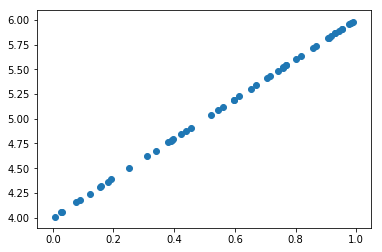

In [5]:
plt.scatter(x, y);

We would now like to learn a and b from our training data x and y. The first step is to define a function that is lower if our guess is closer to the truth. Here we chose the mean squared error.

In [6]:
def mse(y_true, y_pred): return ((y_true - y_pred)**2).mean()

Now we guess some random values for a and b.

In [16]:
a_guess = -3
b_guess = 6

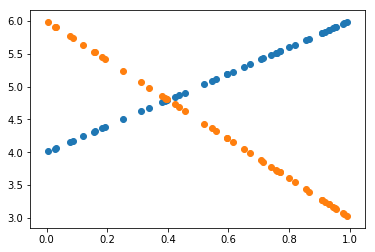

In [17]:
plt.scatter(x, y)
plt.scatter(x, lin(a_guess, b_guess, x));

In [18]:
mse(y, lin(a_guess, b_guess, x))

3.081271873468598

Written in terms of a and b, our **loss function** is:

$L = \frac{1}{n}\sum_n (y_t - (ax + b))^2$

In [19]:
def loss(y, a, b, x): return mse(y, lin(a, b, x))

To know how we have to change a and b to reduce the loss, we compute the derivatives or gradients.

$\frac{dL}{da} = \frac{1}{n}\sum_n -2(y_t - (ax + b))x$

$\frac{dL}{db} = \frac{1}{n}\sum_n -2(y_t - (ax + b))$

If we know those we can iteratively take little steps down the gradient to reduce the loss aka **gradient descent**. How big our steps are is determined by the **learning rate**.

In [20]:
lr = 0.01

In [21]:
def update():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    l = loss(y, a_guess, b_guess, x)
    dLdb = -2 * (y - y_pred)
    dLda = dLdb * x
    a_guess -= lr * dLda.mean()
    b_guess -= lr * dLdb.mean()
    return l

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, y)
line, = ax.plot(x, lin(a_guess, b_guess, x), c='firebrick')
ax.set_title('Loss = 0.00')
plt.close()

def animate(i):
    for i in range(20): l = update()
    ax.set_title('Loss = %.2f' % l)
    line.set_data(x, lin(a_guess, b_guess, x))
    return line,

anim = FuncAnimation(fig, animate, frames=100, interval=150, blit=True)

In [23]:
HTML(anim.to_html5_video())

## Do the same thing with Keras

Keras is a high-level deep learning library which allows us to code up neural networks in a few lines.

First we build a model. Neural networks consist of layers. A dense or fully-connected layer connects all the elements from two layers. In this case we only have one input variable, x, and out output variable, y. A bias, b, is added automatically.

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [26]:
model = Sequential([Dense(1, input_shape=(1,))])

Next we tell Keras to use gradient descent with a learning rate of 0.01 to minimize the mean squared error.

In [27]:
model.compile(SGD(lr=0.01), 'mse')

Then we fit or train the model for 1000 epochs. An epoch describes going through the entire data once.

In [28]:
h = model.fit(x, y, batch_size=n, epochs=1000, verbose=0)

The loss goes down and our parameters are close to the truth.

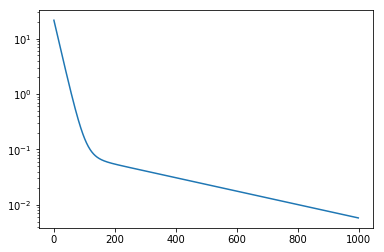

In [29]:
plt.plot(h.history['loss']); plt.yscale('log');

In [30]:
model.get_weights()

[array([[ 2.24604774]], dtype=float32), array([ 3.84904408], dtype=float32)]

# End